In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')
df_testing = pd.read_csv('holdout_test.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     0 non-null      float64
 1   PassengerId  418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 39.3+ KB


### Cabin has the most amount of nulls, exploring that

<AxesSubplot:>

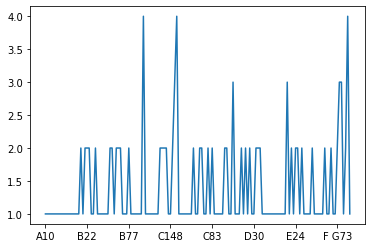

In [6]:
df['Cabin'].value_counts().sort_index().plot()

#### Since we can't infer any distribution and since it has around 80% null values, we can drop it

In [7]:
df = df.drop(axis = 1, columns = ['Cabin'])
df_testing = df_testing.drop(axis = 1, columns = ['Cabin'])

### Since, passenger id won't help in prediction, dropping that too

In [8]:
df = df.drop(axis = 1, columns = ['PassengerId'])
df_testing = df_testing.drop(axis = 1, columns = ['PassengerId'])

In [9]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


## Column analysis

### Survived

In [10]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### PClass

In [11]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

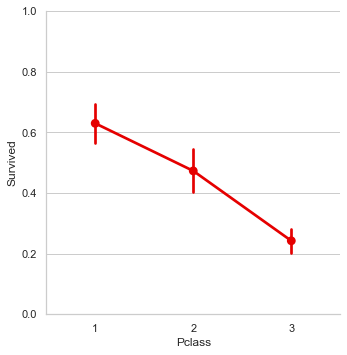

In [12]:
import seaborn as sns

sns.set(style="whitegrid")
g = sns.PairGrid(data=df, x_vars=['Pclass'], y_vars='Survived', height=5)
g.map(sns.pointplot, color=sns.xkcd_rgb["red"])
g.set(ylim=(0, 1))

### Name

In [13]:
df['Name'].value_counts()

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

#### During the time of titanic, people's last names signalled elite/middle class statuses, if we can see a distribution in the last names, we can use them in our model

In [14]:
df['Name'].apply(lambda x: x.split(',')[0]).value_counts()

Andersson    9
Sage         7
Panula       6
Skoog        6
Carter       6
            ..
Hanna        1
Lewy         1
Mineff       1
Haas         1
Dooley       1
Name: Name, Length: 667, dtype: int64

#### Since, we cant' find any significant distribution, we can drop it

In [15]:
df = df.drop(axis = 1, columns = ['Name'])
df_testing = df_testing.drop(axis = 1, columns = ['Name'])

### Sex

In [16]:
df['Sex'].isnull().sum()

0

In [17]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [18]:
df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'male' else 0)
df_testing['Sex'] = df_testing['Sex'].apply(lambda x: 1 if x == 'male' else 0)

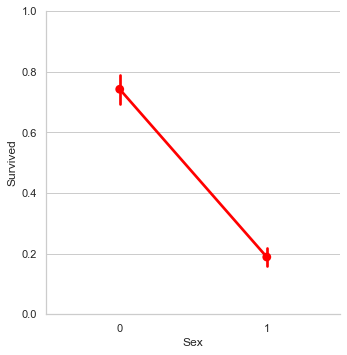

In [19]:
h = sns.PairGrid(data=df, x_vars=['Sex'], y_vars='Survived', height=5)
h.map(sns.pointplot, color="red")
h.set(ylim=(0, 1))

### Age

In [20]:
df['Age'].isnull().sum()

177

In [21]:
df.loc[(df['Sex'] == 0) & (df['Age'].isnull()), 'Age'] = df[df['Sex'] == 0]['Age'].mode()[0]
df.loc[(df['Sex'] == 1) & (df['Age'].isnull()), 'Age'] = df[df['Sex'] == 1]['Age'].mode()[0]

<AxesSubplot:>

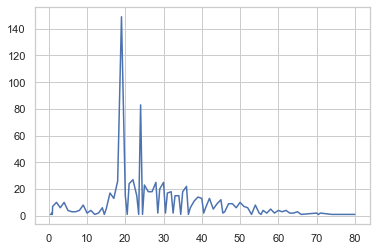

In [22]:
df['Age'].value_counts().sort_index().plot()

In [23]:
df['is_child'] = df['Age'].apply(lambda x: 1 if x <= 18 else 0)
df_testing['is_child'] = df_testing['Age'].apply(lambda x: 1 if x <= 18 else 0)

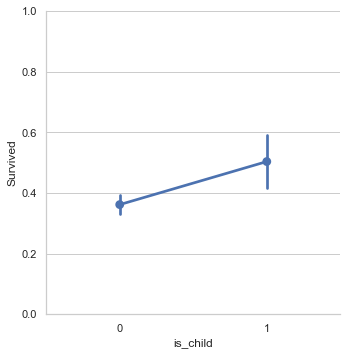

In [24]:
L = sns.PairGrid(data = df, x_vars = ['is_child'], y_vars = 'Survived', height = 5)
L.map(sns.pointplot)
L.set(ylim=(0,1))

In [25]:
df = df.drop(axis = 1, columns = ['Age'])
df_testing = df_testing.drop(axis = 1, columns = ['Age'])

## SibSp

In [26]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

## Parch

In [27]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [28]:
df['family'] = df['SibSp'] + df['Parch']
df_testing['family'] = df_testing['SibSp'] + df_testing['Parch']

In [29]:
df = df.drop(['SibSp', 'Parch'], axis = 1)
df['family'] = df['family'].apply(lambda x: 1 if x == 0 else 0)

df_testing = df_testing.drop(['SibSp', 'Parch'], axis = 1)
df_testing['family'] = df_testing['family'].apply(lambda x: 1 if x == 0 else 0)

### Ticket

In [30]:
df['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [31]:
df = df.drop(axis = 1, columns = ['Ticket'])
df_testing = df_testing.drop(axis = 1, columns = ['Ticket'])

### Fare

In [32]:
df['Fare'].isnull().sum()

0

In [33]:
df['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

In [34]:
df_testing['Fare'] = df_testing['Fare'].fillna(df['Fare'].mean())

In [35]:
df_testing['Fare'].isnull().sum()

0

### Embarked

In [36]:
print(df['Embarked'].isnull().sum())
print(df_testing['Embarked'].isnull().sum())

2
0


In [37]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [38]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

### One hot Encoding

In [39]:
final_df = pd.get_dummies(df)
df_testing = pd.get_dummies(df_testing)

## Modelling

In [40]:
df_testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    0 non-null      float64
 1   Pclass      418 non-null    int64  
 2   Sex         418 non-null    int64  
 3   Fare        418 non-null    float64
 4   is_child    418 non-null    int64  
 5   family      418 non-null    int64  
 6   Embarked_C  418 non-null    uint8  
 7   Embarked_Q  418 non-null    uint8  
 8   Embarked_S  418 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 20.9 KB


In [41]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Fare        891 non-null    float64
 4   is_child    891 non-null    int64  
 5   family      891 non-null    int64  
 6   Embarked_C  891 non-null    uint8  
 7   Embarked_Q  891 non-null    uint8  
 8   Embarked_S  891 non-null    uint8  
dtypes: float64(1), int64(5), uint8(3)
memory usage: 44.5 KB


In [42]:
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report, accuracy_score

In [43]:
y = final_df.pop('Survived')

In [44]:
X_train, X_test, y_train, y_test = train_test_split(final_df, y, train_size = 0.8, test_size = 0.2, random_state = 42)

In [45]:
import warnings
warnings.filterwarnings("ignore")

from sklearn import metrics
data = []

def model(model, name):
    
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    print(train_accuracy)

    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print(test_accuracy)
    
    print(classification_report(y_test, y_pred))
    data.append([name, train_accuracy, test_accuracy])

In [46]:
logistic = LogisticRegression()
model(logistic, 'LogisticRegression')

0.7837078651685393
0.770949720670391
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       105
           1       0.73      0.72      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



In [47]:
desc_tree = DecisionTreeClassifier()
model(desc_tree, 'DecisionTreeClassifier')

0.9311797752808989
0.8100558659217877
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [48]:
random_forest = RandomForestClassifier()
model(random_forest, 'RandomForestClassifier')

0.9311797752808989
0.8044692737430168
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       105
           1       0.75      0.78      0.77        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.80      0.80       179



In [49]:
naive_bayes = GaussianNB()
model(naive_bayes, 'GaussianNB')

0.7710674157303371
0.7374301675977654
              precision    recall  f1-score   support

           0       0.78      0.77      0.78       105
           1       0.68      0.69      0.68        74

    accuracy                           0.74       179
   macro avg       0.73      0.73      0.73       179
weighted avg       0.74      0.74      0.74       179



##  Though Desc Tree and Random forest have higher test accuracies, but since the difference between train and test accuracies is high, it may signal overfitting. Thus, proceeding with logistic regression

In [50]:
logistic.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [51]:
param_grid = {
    'penalty' : ['l1', 'l2', 'elasticnet', None],
    'solver' : ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
    'tol' : [0.01, 0.001, 0.0001]
}

In [52]:
rsearch = RandomizedSearchCV(estimator = logistic,param_distributions=param_grid,cv=2,scoring="accuracy",n_jobs=-1,n_iter = 20,verbose=1, random_state = 180)

In [53]:
%time rsearch.fit(X_train,y_train)

Fitting 2 folds for each of 20 candidates, totalling 40 fits
CPU times: total: 109 ms
Wall time: 2.46 s


RandomizedSearchCV(cv=2, estimator=LogisticRegression(), n_iter=20, n_jobs=-1,
                   param_distributions={'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['liblinear', 'newton-cg',
                                                   'lbfgs', 'sag', 'saga'],
                                        'tol': [0.01, 0.001, 0.0001]},
                   random_state=180, scoring='accuracy', verbose=1)

In [54]:
%time model(rsearch.best_estimator_, 'logistic_tuned')

0.7865168539325843
0.7821229050279329
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

CPU times: total: 0 ns
Wall time: 7 ms


### We see an improvement in accuracy

In [55]:
df_scores = pd.DataFrame(data, columns = ['model', 'train_accuracy', 'test_accuracy']).sort_values(by = 'test_accuracy', ascending = False)
df_scores

,model,train_accuracy,test_accuracy
1,DecisionTreeClassifier,0.931180,0.810056
2,RandomForestClassifier,0.931180,0.804469
4,logistic_tuned,0.786517,0.782123
0,LogisticRegression,0.783708,0.770950
3,GaussianNB,0.771067,0.737430


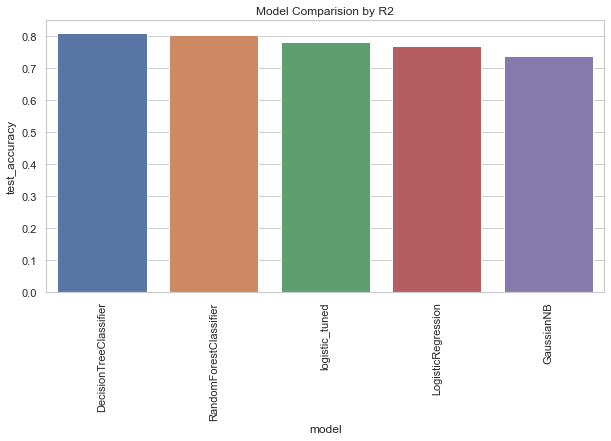

In [56]:
plt.figure(figsize = (10, 5))
sns.barplot(x = 'model', y = 'test_accuracy', data=df_scores,order=df_scores['model']).set_xticklabels(labels = df_scores['model'], rotation=90)
plt.title('Model Comparision by R2')
plt.show()

In [57]:
df_testing.pop('Survived')

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
413   NaN
414   NaN
415   NaN
416   NaN
417   NaN
Name: Survived, Length: 418, dtype: float64

In [58]:
y_test_pred = rsearch.best_estimator_.predict(df_testing)

In [59]:
y_test_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [61]:
pd.DataFrame(y_test_pred, columns = ['Results']).to_csv('TitanticResults_jasmeetsingh.csv')